# Analyze data from the 2012 election
#More data : https://fivethirtyeight.com/politics/

1.) Who was being polled and what was their party affiliation?

2.) Did the poll results favor Romney or Obama?

3.) How do undecided voters effect the poll?

4.) Can we account for the undecided voters?

5.) How did voter sentiment change over time?

6.) Can we see an effect in the polls from the debates?

In [52]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [53]:
#Import Data From HuffPpost Pollster
#Use requests module to import data
import requests

In [54]:
#StringIO 表示把數據讀寫成 str 形式
from io import StringIO

In [55]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

# Use requests to get the information in text form
source = requests.get(url).text
# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [56]:
poll_df = pd.read_csv(poll_data)

In [57]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [58]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


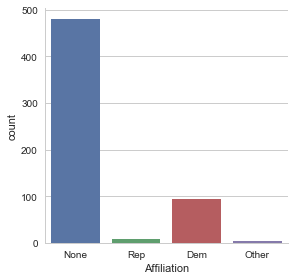

In [50]:
sns.factorplot('Affiliation', data=poll_df, kind='count')
#加入 kind='count' 避免str&int不能打印的問題

In [62]:
#檢查 affiliation 的 other 是哪些數據
filter = (poll_df['Affiliation'] == 'Other')
poll_df[filter]

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
551,Politico / Penn Schoen Berland,2010-12-03,2010-12-08,2010-12-15T17:47:12Z,1668.0,Adults,Internet,40.0,33.0,27.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/static/PPM187_politico...,Sponsor,Other,NaN,1
555,Politico / Penn Schoen Berland,2010-11-08,2010-11-11,2010-11-16T10:55:05Z,1668.0,Adults,Internet,40.0,32.0,28.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/static/PPM182_101115_r...,Sponsor,Other,NaN,1
559,Politico / Penn Schoen Berland,2010-08-06,2010-08-11,2010-11-08T12:00:01Z,1668.0,Adults,Internet,42.0,33.0,24.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/static/PPM152_1008013_...,Sponsor,Other,NaN,1
562,Politico / Penn Schoen Berland,2010-07-09,2010-07-14,2010-11-08T11:50:54Z,1011.0,Adults,Internet,39.0,35.0,26.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/static/PPM136_100718_p...,Sponsor,Other,NaN,1


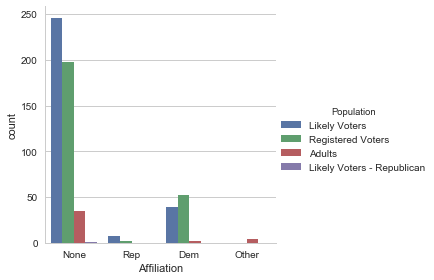

In [64]:
# Factorplot the affiliation by Population
sns.factorplot('Affiliation', data=poll_df, hue = 'Population', kind = 'count')

In [90]:
avg = pd.DataFrame(poll_df.mean())
avg.head()

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [91]:
#we don't use the number of obsrvation, so we drop the row
ind = ['Number of Observations','Question Text','Question Iteration']
avg.drop(ind, axis = 0, inplace = True) #inplace=True 代替原本的值
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [92]:
std = pd.DataFrame(poll_df.std())
ind = ['Number of Observations','Question Text','Question Iteration']
std.drop(ind, axis = 0, inplace = True) 
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


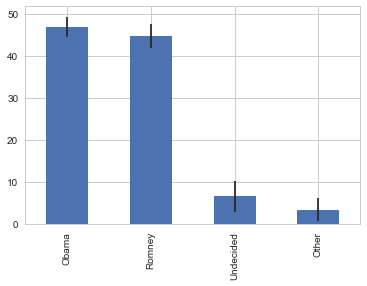

In [93]:
avg.plot(yerr=std, kind='bar', legend = False)

In [95]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['AVG', 'STD']
poll_avg

,AVG,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


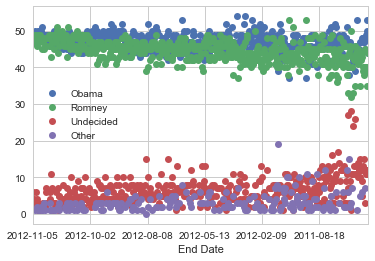

In [98]:
# Quick plot of sentiment in the polls versus time.
poll_df.plot(x = 'End Date', y = ['Obama','Romney','Undecided','Other'], linestyle = '', marker = 'o')

In [99]:
#Plot the sentiment versus time 
#(Plot out the difference between Obama and Romney and how it changes as time moves along)

# For timestamps
from datetime import datetime

In [103]:
#Create a new column showing difference between the poll of Obama's and Romney's (shown by percentage)
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06T07:38:41Z,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1,0.00
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1,0.01
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05T16:12:48Z,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1,0.02
8,ARG,2012-11-02,2012-11-04,2012-11-05T13:06:54Z,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1,0.00
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04T22:32:19Z,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1,0.02


In [104]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
#as_index = False 會按照原本的0,1,2,3..來排序; as_index = True 會按照groupby的start date來排序

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


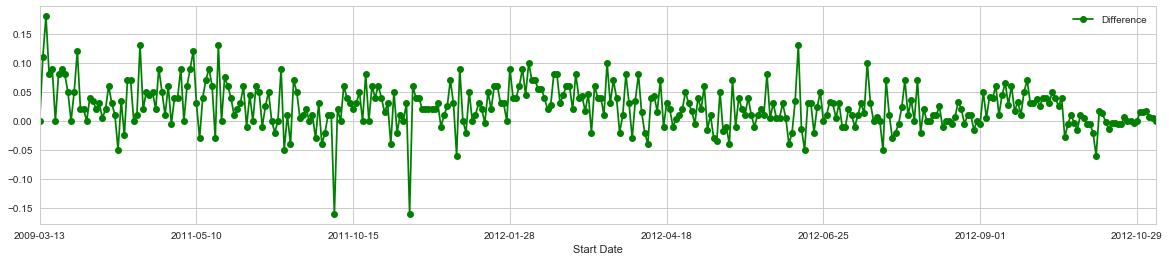

In [108]:
# Plotting the difference in polls between Obama and Romney
poll_df.plot('Start Date','Difference',figsize = (20,4), linestyle = '-', marker = 'o', color = 'green')

#outcome: difference > 0 means ppl prefer Obama; difference < 0 means ppl prefer Romney
#outcome: 發現有兩點人民特別喜歡Romney，可以深入挖掘原因 why Romney polls so strong on these two particular days?

In [112]:
#透過迴圈找出十月（辯論月）的資料在哪個位置（上下屆）： where the index is equal to the month of October
#Plot marker lines on the dates of the debates and see if there is any general insight to the poll results
#The debate dates were 10/3 10/11 10/22
#To find where to set the x limits for the figure, we need to find out where the index for the month of October in 2012 is.
#(use loop to find out the row)

# Set row count and xlimit list
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

        
min(xlimit)

325

In [113]:
max(xlimit)

352

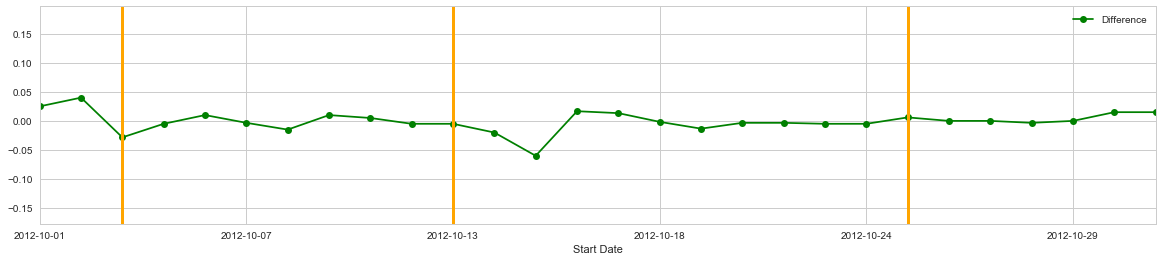

In [119]:
# Start with original figure
poll_df.plot('Start Date','Difference',figsize = (20,4), linestyle = '-', marker = 'o', color = 'green', xlim = (325,352))

#plot verticle line(axvline) to show the debate date
#Oct 3rd (10/1(位置325)加2天)
plt.axvline(x=325+2, linewidth = 3, color = 'orange' )
#Oct 11th
plt.axvline(x=325+10, linewidth = 3, color = 'orange' )
#Oct 22nd
plt.axvline(x=325+21, linewidth = 3, color = 'orange' )


#outcome: After 1st, ppl love Obama more; after 2nd debate, ppl love Romney; after 3rd debate, it's even
#findings: Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.
#further digout: look to the performance of two candiates on the debate, geographical location of ppl being polled, their occupatons, etc

# Donor Data Set
Information on donations to the federal campaign



The questions we will be trying to answer while looking at this Data Set is:


1.) How much was donated and what was the average donation? 

2.) How did the donations differ between candidates? 

3.) How did the donations differ between Democrats and Republicans? 

4.) What were the demographics of the donors? 

5.) Is there a pattern to donation amounts?

In [122]:
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/joanna/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [124]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [127]:
#calculate the actual donation amount
#value_counts() - counts how many times each unique value occurs
donor_df['contb_receipt_amt'].value_counts()

#outcome: there are 178188 ppl donate $100, etc.

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [146]:
#look at the avg and std of donation
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

'The average donation was "%.2f" with a std "%.2f"' %(don_mean, don_std)



'The average donation was "298.24" with a std "3749.67"'

*Outcome: std is 3749.67, a huge std of donation, so we need to check if any outliner(extremely big value) messes up the outcome

In [164]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(ascending = True, inplace = True)
top_donor.head(10)

114604   -30800.00
226986   -25800.00
101356    -7500.00
398429    -5500.00
250737    -5455.00
33821     -5414.31
908565    -5115.00
456649    -5000.00
574657    -5000.00
30513     -5000.00
Name: contb_receipt_amt, dtype: float64

*Outcome: 發現前幾筆資料有退款的問題（refund value is negative)，所以去掉這些資料，再重新分析

In [166]:
#remove the negative data
top_donor = top_donor[top_donor > 0]
top_donor.sort_values(ascending = True, inplace = True)
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

*Outcome: now we have top ten common donation

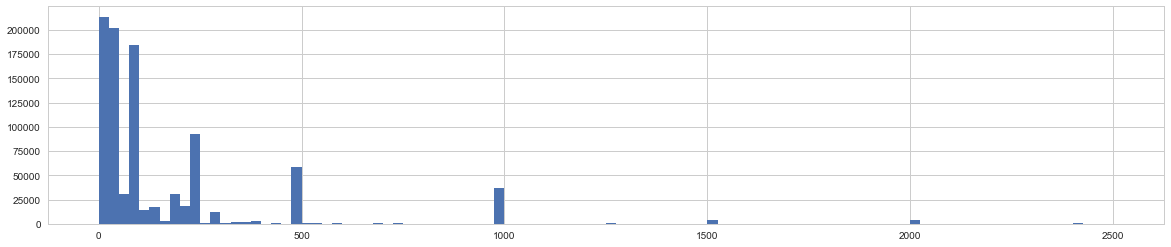

In [175]:
#verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.)
#check if any unusual peak at round number values
com_donor = top_donor[top_donor < 2500]
com_donor.hist(bins=100, figsize = (20,4))

In [176]:
#seperate donations by Party

#create a new 'party column, and before that, we need to see unique name of every candidate first
candidates = donor_df['cand_nm'].unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [179]:
#create a new party column
#method 1 (faster way)
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

#map the party with candidate names
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [180]:
#Method 2 (slower) - use loop to separate candidate into dif parties, rep or dem
'''
for i in xrange(0, len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'] = 'Democrat'
    else:
        donor_df['Party'] = 'Republican'
'''

"\nfor i in xrange(0, len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'] = 'Democrat'\n    else:\n        donor_df['Party'] = 'Republican'\n"

In [182]:
#確保不要有退款情況，對原資料做處理
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head(10)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [183]:
#group by candidate, show how many times they got receipt amount
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

*Outcome: Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. 

In [194]:
#The total dollar amounts
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#show the above result in more readable format
i=0

for don in cand_amount:
    print('The candidate %s raise %.0f dollars' %(cand_amount.index[i], don))
    print('\n')
    i += 1
    

The candidate Bachmann, Michelle raise 2711439 dollars


The candidate Cain, Herman raise 7101082 dollars


The candidate Gingrich, Newt raise 12832770 dollars


The candidate Huntsman, Jon raise 3330373 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 39030 dollars


The candidate Obama, Barack raise 135877427 dollars


The candidate Paul, Ron raise 21009620 dollars


The candidate Pawlenty, Timothy raise 6004819 dollars


The candidate Perry, Rick raise 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 373010 dollars


The candidate Romney, Mitt raise 88335908 dollars


The candidate Santorum, Rick raise 11043159 dollars




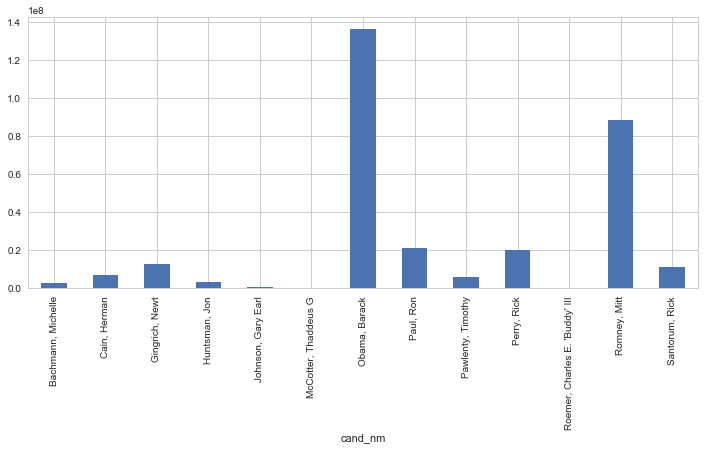

In [198]:
cand_amount.plot(kind='bar', figsize = (12,5))

*Outcome: Obama is the front-runner in donation amounts, which makes sense, since he is not competeing with any other democratic nominees.

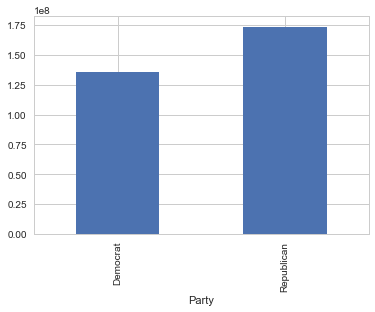

In [199]:
#How about we just compare Democrat versus Republican donations?
## Groupby party and then count donations
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

*Outcome: Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

In [202]:
#look at the donation and who they came from (as far as occupation is concerned)

occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index = 'contbr_occupation',
                                    columns = 'Party',
                                    aggfunc = 'sum')

occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [203]:
#Check size
occupation_df.shape
#shape : 讀取矩陣第一維度的資料長度 = 45067

(45067, 2)

*Outcome: What we should do is have a cut-off for total contribution amounts. Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars. 挑選對選情有影響的捐款額，進行切割

In [204]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000] #sum(1) = sum(axis=1)

In [205]:
occupation_df.shape

(31, 2)

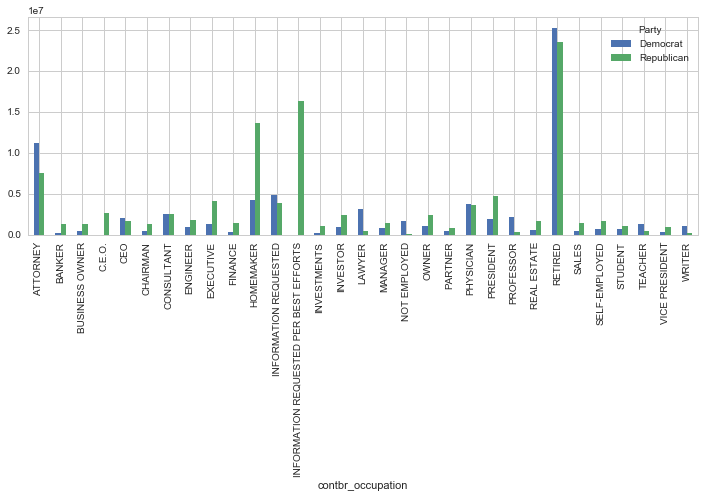

In [207]:
occupation_df.plot(kind='bar',figsize = (12,4))

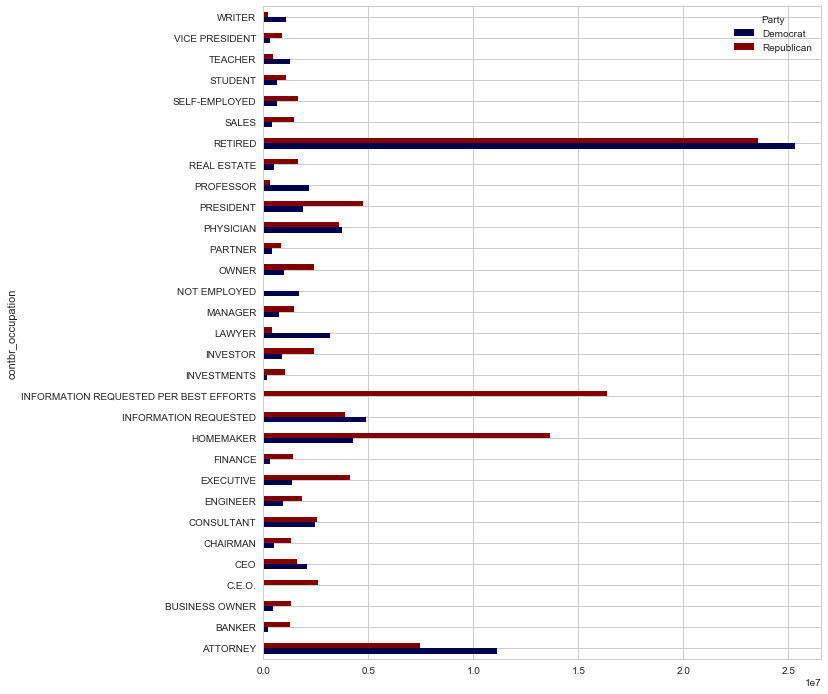

In [208]:
#More readable version
occupation_df.plot(kind='barh', figsize = (10,12), cmap = 'seismic') #cmap = color map

*Outcome: Looks like there are some occupations that are either mislabeled or aren't really occupations. Let's get rid of: Information Requested occupations and let's combine CEO and C.E.O.

In [210]:
#drop mislabeled occupation
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis = 0, inplace = True)

In [213]:
#combine CEO and C.E.O., which are the same occupations
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
occupation_df.drop('C.E.O.', inplace = True)

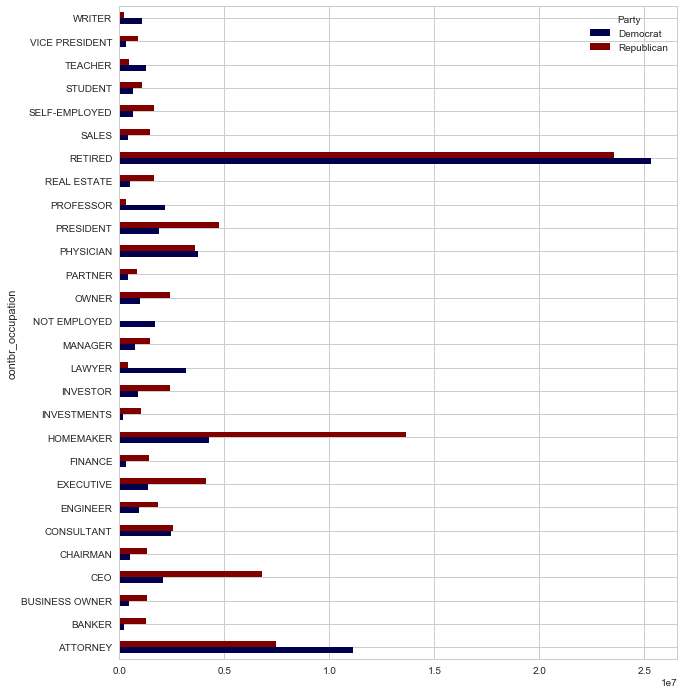

In [214]:
#plot again
occupation_df.plot(kind='barh', figsize = (10,12), cmap = 'seismic')

*Outcome: Looks like CEOs are a little more conservative leaning, this may be due to the tax philosphies of each party during the election.